In [2]:
import pandas as pd
from google.colab import files

# This will prompt you to upload the file from your computer
uploaded = files.upload()

# Get the filename from the uploaded files dictionary
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Read the CSV file into a pandas DataFrame
# Make sure to use the correct filename here if it's different
df = pd.read_csv('Encoding_dataset.csv')

# Display the first 5 rows of the DataFrame to verify it loaded correctly
print(df.head())

Saving Encoding_dataset.csv to Encoding_dataset.csv
User uploaded file "Encoding_dataset.csv" with length 387966 bytes
    Age  Gender  Blood Pressure  Cholesterol Level  Smoking  \
0  29.0       1           152.0              213.0        0   
1  53.0       0           144.0              253.0        1   
2  37.0       1           139.0              283.0        1   
3  52.0       0           175.0              275.0        1   
4  66.0       1           132.0              240.0        0   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
0                     1         0  23.405044                    1   
1                     1         0  21.030990                    0   
2                     1         1  27.708483                    0   
3                     0         0  37.725994                    1   
4                     0         0  25.976203                    0   

   Low HDL Cholesterol  ...  Fasting Blood Sugar  CRP Level  \
0                    1  

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assume 'df' is your original DataFrame loaded from the CSV
# df = pd.read_csv('Encoding_dataset.csv')

# --- Step 1: Encode the categorical columns ---
# Use pandas.get_dummies() to automatically find and convert columns with text
df_encoded = pd.get_dummies(df)

print("## Data after One-Hot Encoding (first 5 rows) ##")
print(df_encoded.head())
print("\nDataFrame columns after encoding:")
print(df_encoded.columns)


# --- Step 2: Now, apply the scaler to the fully numerical DataFrame ---
scaler = StandardScaler()

# Fit and transform the encoded data
df_scaled_encoded = scaler.fit_transform(df_encoded)

# Convert back to a DataFrame to view it easily
df_scaled_encoded = pd.DataFrame(df_scaled_encoded, columns=df_encoded.columns)

print("\n" + "="*50 + "\n")
print("## Data after both Encoding and Scaling (first 5 rows) ##")
print(df_scaled_encoded.head())

## Data after One-Hot Encoding (first 5 rows) ##
    Age  Gender  Blood Pressure  Cholesterol Level  Smoking  \
0  29.0       1           152.0              213.0        0   
1  53.0       0           144.0              253.0        1   
2  37.0       1           139.0              283.0        1   
3  52.0       0           175.0              275.0        1   
4  66.0       1           132.0              240.0        0   

   Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
0                     1         0  23.405044                    1   
1                     1         0  21.030990                    0   
2                     1         1  27.708483                    0   
3                     0         0  37.725994                    1   
4                     0         0  25.976203                    0   

   Low HDL Cholesterol  ...  Heart Disease Status  Exercise Habits_Low  \
0                    1  ...                     1                    1   
1        

## Histograms Before Scaling ##


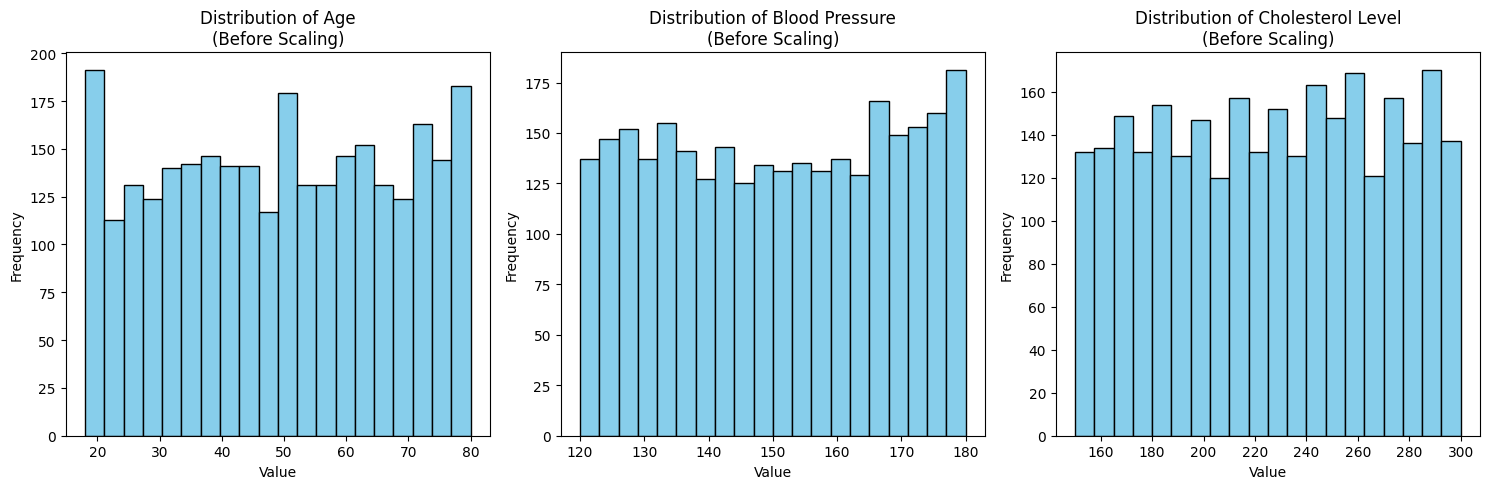


## Histograms After Scaling ##


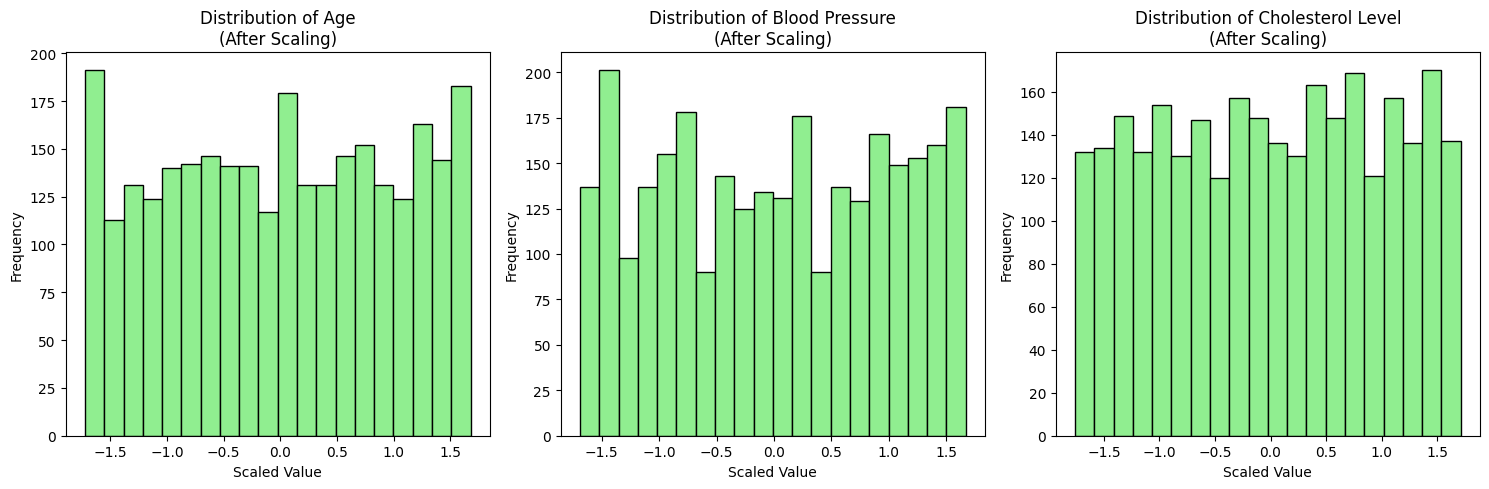

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# --- Step 1: Load and Prepare the Data ---

# Load the original DataFrame
df = pd.read_csv('Encoding_dataset.csv')

# Perform one-hot encoding to handle categorical columns
df_encoded = pd.get_dummies(df)

# --- Step 2: Scale the Data ---

# Initialize the scaler
scaler = StandardScaler()

# Create the scaled DataFrame
df_scaled_encoded = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)


# --- Step 3: Visualize with Histograms ---

# Select a few interesting numerical columns to visualize
columns_to_plot = ['Age', 'Blood Pressure', 'Cholesterol Level']

# Plotting histograms BEFORE scaling
print("## Histograms Before Scaling ##")
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1)
    plt.hist(df_encoded[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}\n(Before Scaling)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show() # Use plt.show() to display the plot inline


# Plotting histograms AFTER scaling
print("\n## Histograms After Scaling ##")
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1)
    plt.hist(df_scaled_encoded[col], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {col}\n(After Scaling)')
    plt.xlabel('Scaled Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show() # Use plt.show() to display the plot inline

In [7]:
from google.colab import files

# The final DataFrame from the previous steps should be named 'df_scaled_encoded'
output_filename = 'scaled_encoded_dataset.csv'

# Save the DataFrame to a CSV file
df_scaled_encoded.to_csv(output_filename, index=False)

# Trigger the download
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>